---- NOTE TO EACH OTHER ----  
Hey team,  
What I noticed about Q6 vs. Q26: there are a lot more NAs in Q26.  
  
-Jean

# Stats 131 Final Project
by Will Jung, Iris Liu, Kellie Lue, Jean Rim 

## Part 1: Background Information

(insert info)

## Part 2.1: Data Cleaning

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
MCresponses = pd.read_csv('multipleChoiceResponses.csv')
MCresponses.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


This data needs a lot of cleaning because it is difficult to work with so many columns and obscure variable names.  
Therefore, we created a subset of the data.

### Subsetting Data

In [23]:
# Created a subset of the data based on interesting information
data = MCresponses.loc[:, ('Q1','Q2','Q3','Q4','Q5','Q6','Q8','Q9','Q10','Q12_MULTIPLE_CHOICE','Q23','Q24','Q26')]
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q9,Q10,Q12_MULTIPLE_CHOICE,Q23,Q24,Q26
0,What is your gender? - Selected Choice,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Does your current employer incorporate machine...,What is the primary tool that you use at work ...,Approximately what percent of your time at wor...,How long have you been writing code to analyze...,Do you consider yourself to be a data scientist?
1,Female,45-49,United States of America,Doctoral degree,Other,Consultant,NaN,NaN,I do not know,"Cloud-based data software & APIs (AWS, GCP, Az...",0% of my time,I have never written code but I want to learn,Maybe
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,5-10,"10-20,000",No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G...",1% to 25% of my time,I have never written code but I want to learn,Definitely not
3,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,0-1,"0-10,000",I do not know,Local or hosted development environments (RStu...,75% to 99% of my time,5-10 years,Definitely yes
4,Male,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,NaN,NaN,NaN,Local or hosted development environments (RStu...,50% to 74% of my time,5-10 years,Probably yes


In [27]:
print(data.loc[0,:]) # These column names are not clear
data.columns = ['gender','age','country','education','undergrad_major',
                'current_title','years_exp_curr_role','yearly_compensation',
                'employer_ml', 'primary_data_tool','percentage_time_spent_coding', 
                'coding_exp', 'data_scientist']

# Delete first row
data = data.drop([0], axis=0)
data.head()

gender                                     What is your gender? - Selected Choice
age                                                   What is your age (# years)?
country                                 In which country do you currently reside?
education                       What is the highest level of formal education ...
undergrad_major                 Which best describes your undergraduate major?...
current_title                   Select the title most similar to your current ...
years_exp_curr_role             How many years of experience do you have in yo...
yearly_compensation             What is your current yearly compensation (appr...
employer_ml                     Does your current employer incorporate machine...
primary_data_tool               What is the primary tool that you use at work ...
percentage_time_spent_coding    Approximately what percent of your time at wor...
coding_exp                      How long have you been writing code to analyze...
data_scientist  

,gender,age,country,education,undergrad_major,current_title,years_exp_curr_role,yearly_compensation,employer_ml,primary_data_tool,percentage_time_spent_coding,coding_exp,data_scientist
1,Female,45-49,United States of America,Doctoral degree,Other,Consultant,NaN,NaN,I do not know,"Cloud-based data software & APIs (AWS, GCP, Az...",0% of my time,I have never written code but I want to learn,Maybe
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,5-10,"10-20,000",No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G...",1% to 25% of my time,I have never written code but I want to learn,Definitely not
3,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,0-1,"0-10,000",I do not know,Local or hosted development environments (RStu...,75% to 99% of my time,5-10 years,Definitely yes
4,Male,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,NaN,NaN,NaN,Local or hosted development environments (RStu...,50% to 74% of my time,5-10 years,Probably yes
5,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,0-1,"0-10,000",I do not know,"Advanced statistical software (SPSS, SAS, etc.)",75% to 99% of my time,5-10 years,Maybe


### Dealing with NA

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23859 entries, 1 to 23859
Data columns (total 13 columns):
gender                          23859 non-null object
age                             23859 non-null object
country                         23859 non-null object
education                       23438 non-null object
undergrad_major                 22947 non-null object
current_title                   22900 non-null object
years_exp_curr_role             21101 non-null object
yearly_compensation             20185 non-null object
employer_ml                     20669 non-null object
primary_data_tool               19198 non-null object
percentage_time_spent_coding    18547 non-null object
coding_exp                      18533 non-null object
data_scientist                  18480 non-null object
dtypes: object(13)
memory usage: 3.2+ MB


# --------- NEED TO ADD to this ^ ----------- 


## Part 2.2: Exploratory Analysis

data_scientist                Definitely not  Probably not  Maybe  \
percentage_time_spent_coding                                        
0% of my time                            167           152    110   
1% to 25% of my time                     555          1015   1056   
100% of my time                           39            72    106   
25% to 49% of my time                    345           849   1152   
50% to 74% of my time                    298           712   1209   
75% to 99% of my time                    151           359    545   

data_scientist                Probably yes  Definitely yes  
percentage_time_spent_coding                                
0% of my time                           55              55  
1% to 25% of my time                   890             659  
100% of my time                        109             155  
25% to 49% of my time                 1414            1232  
50% to 74% of my time                 1645            1652  
75% to 99% of my tim

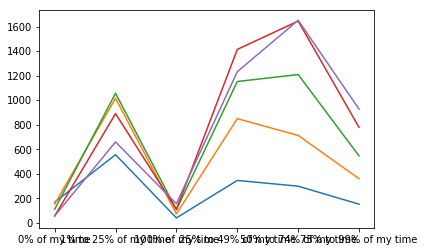

In [84]:
# Relationship between % time spent coding and whether they identified as a data scientist
table = data.groupby(['percentage_time_spent_coding', 'data_scientist']).gender.count().unstack()

# Reorder to view easily
table = table.loc[:, ('Definitely not', 'Probably not', 'Maybe', 'Probably yes', 'Definitely yes')]
print(table)

plt.plot(table)